# Clasificación: Toy Example

# 13.
13. Considere la regla de clasificación que determina que un nido corresponde a la especie rechazadora ($Y = 1$) si la cantidad de huevos removidos es mayor o igual a t = 5.

  Caso contrario, determina que el nido es de la especie hospedadora aceptadora ($Y = 0$).

  Implemente una función `regla5` que dado x, el número de huevos agredidos, devuelva el valor $1$ si x ≥ 5, y devuelva el valor $0$, caso contrario.

  Observe que la regla de clasificación es una función g que para cada x determina un valor en $\{0, 1\}$.

  Calcule $\hat R_5$, la tasa de error empírica correspondiente a esta regla, utilizando los datos de `depredadosclasificadas.txt`.

  Es decir, calcule la proporción de datos **mal clasificados** según esta regla.

In [144]:
data <- read.csv('depredadosclasificadas.txt', sep=' ')
head(data)

removidos,especie
2,0
4,1
5,1
1,0
2,0
3,0


In [145]:
regla5 <- function(x){
    # x: numerico o vector
    return(as.integer(x>=5))
}

In [146]:
preds.5 <- regla5(data$removidos)

In [147]:
error.5 <- mean(abs(preds.5 - data$especie))
error.5

[1] 0.078

> Mal clasificados: $7.8\%$

# 14.

14. Considere la regla de clasificación que determina que un nido corresponde a la especie rechazadora (Y = 1) si la cantidad de huevos removidos es par.

  Caso contrario, determina que el nido es de un hospedador aceptador (Y = 0).

  Implemente una función `rechazadorpar` que dado x, el número de huevos agredidos, devuelva el valor 1 si x es par, y devuelva el valor 0, caso contrario. Calcule la tasa de error empı́rica correspondiente a esta regla, utilizando los datos depredadosclasificadas.

  Es decir, calcule la proporción de datos mal clasificados según esta regla.

In [148]:
rechazadorpar <- function(x){
    # la mejor regla jamás vista
    return(as.integer(x%%2==0))
}

In [149]:
preds.par <- rechazadorpar(data$removidos)

In [150]:
error.par <- mean(abs(preds.par - data$especie))
error.par

[1] 0.517

> Erra el $51.7\%$ de los casos.

# 15.

15. ¿Cuál de las reglas consideradas en los items anteriores (regla5 o rechazadorpar)
prefiere?

> Prefiero rechazadorpar, porque muestra que una regla no tiene por qué tener un sentido lógico para devolver un resultado, y da una mejor idea de lo que significa el concepto de regla de clasificación.
>
>  Claramente es una porquería para este caso, pero si hubieramos obtenido un error muy bajo, sería indicativo de que algo poco probale pasa, con evidencia de que los pájaros rechazadores tienen tendencia a rechazar una cantidad par de huevos, mientras los otros una impar, lo cual sería absurdamente interesante.

# 16.
16. Para cada t ∈ {0, . . . , 8}, considere la regla de clasificación que determina que un nido corresponde a la variedad rechazadora (Y = 1) si la cantidad de huevos removidos es mayor o igual a t.

  Caso contrario, determina que el nido es del hospedador aceptador (Y = 0).
  
  Implemente una función `reglacorte` que dados x y t, el número de huevos removidos y el punto de corte, respectivamente, devuelva el valor 1 si x ≥ t, y devuelva el valor 0, caso contrario. 
  
  Calcule $\hat R_t$ , la tasa de error empı́rica correspondiente a regla con punto de corte en t utilizando los datos depredadosclasificadas.

  Es decir, calcule la proporción de datos mal clasificados según cada regla, para 0 ≤ t ≤ 8.

In [151]:
reglacorte <- function(x, t){
    return(as.integer(x>=t))
}

In [152]:
ts <- 0:9
error.t <- rep(NA, length(ts))
for(t in ts){
    preds.t <- reglacorte(data$removidos, t)
    error.t[t+1] <- mean(abs(preds.t - data$especie))
}


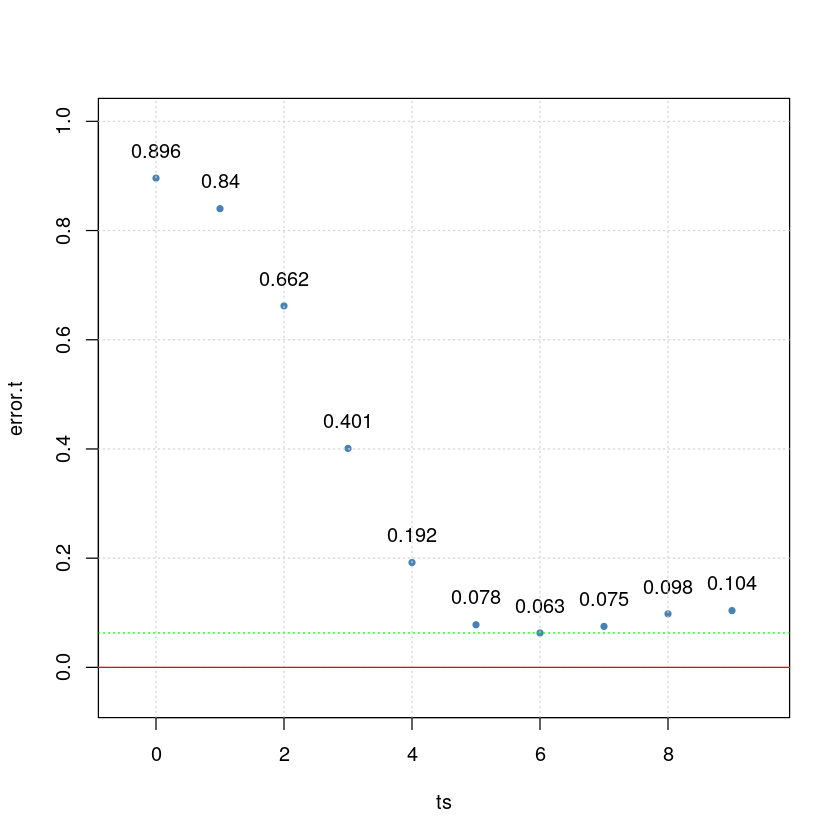

In [153]:
plot(ts, error.t, xlim=c(-0.5,9.5), ylim=c(-0.05, 1), col='steelblue', pch=20)
text(x=ts, y=error.t+0.05, labels=error.t)
grid()
abline(h=0, col='red')
abline(h=min(error.t), col='green', lty=3)

17. ¿Con qué punto de corte obtiene la regla con menor error de clasificación empı́rico?

In [154]:
ts[which.min(error.t)]

[1] 6

> El menor error se obtiene con el punto de corte en $t=6$, con un error de clasificación de $6.3\%$

# (∗) Bonus Track

# 18.

18. Una regla de clasificación $h$ puede expresarse mediante una tira de ceros y unos que indica cuánto vale $h$ para los diferentes valores de $x$.

Por ejemplo, la tira `(0, 0, 0, 1, 1, 1, 0, 1, 1)` indica que $h(0) = 0$, $h(1) = 0$, $h(2) = 0$, $h(3) = 1$, $h(4) = 1$, etc.

Implemente la función `ErrorClassTRUE` que tenga por input un vector de ceros y unos y de longitud 9 y devuelva el error de clasificación medio de la regla h, dado por $P (h(X) \ne Y )$.

In [155]:
ErrorClassTrue <- function(h){
    X <- data$removidos
    Y <- data$especie
    m <- length(X)
    error <- 0
    for(i in 1:m){
        xi <- X[i]
        yi <- Y[i]
        error <- error + (h[xi+1] != yi)
    }
    error <- error / m
    return(error)
}

In [156]:
ErrorClassTrue(c(0,0,0,0,0,0,1,1,1))

[1] 0.063

# 19.

19. Calcule el error de clasificación medio correspondiente a la regla con punto de corte en
t, para cada t ∈ {0, . . . , 8} Recuerde que si h(X) es una regla de clasificación, su error
de clasificación medio está dado por
P(h(X) 6 = Y ) .
Grafique el error de clasificación medio como función de t.

In [157]:
ts <- 0:9
error.t <- rep(NA, length(ts))
for(t in ts){
    if(t==0){
        h <- rep(1, 9)
    }
    else if(t==9){
        h <- rep(0, 9)
    }
    else{
        h <- c(rep(0, t), rep(1, 9-t))
    }
    
    error.t[t+1] <- ErrorClassTrue(h)
}

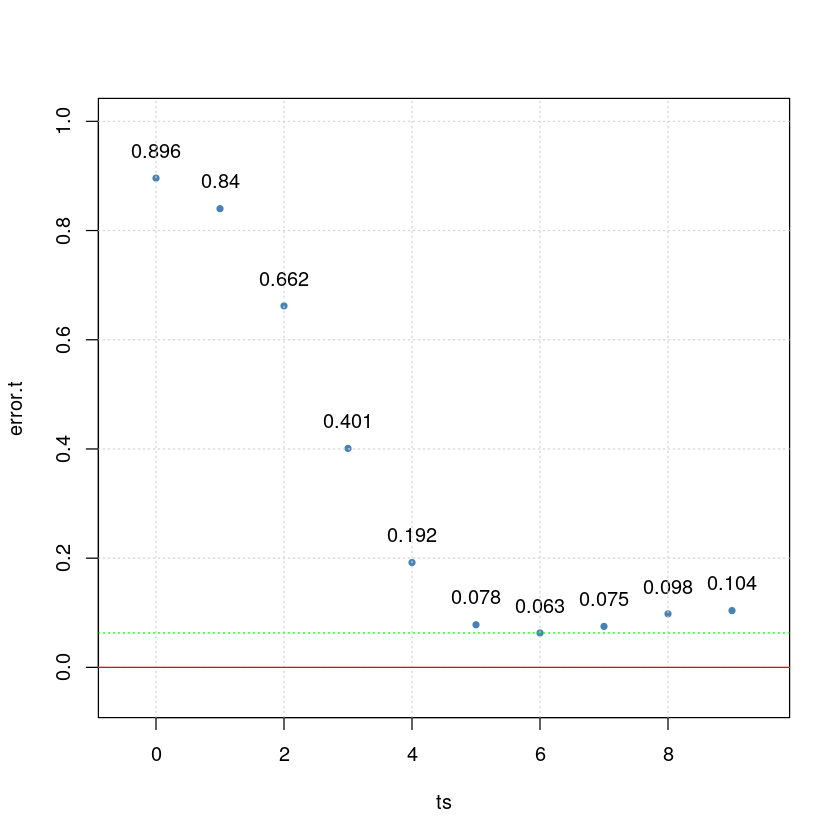

In [158]:
plot(ts, error.t, xlim=c(-0.5,9.5), ylim=c(-0.05, 1), col='steelblue', pch=20)
text(x=ts, y=error.t+0.05, labels=error.t)
grid()
abline(h=0, col='red')
abline(h=min(error.t), col='green', lty=3)

# 20.

20. Implemente una función rHuevosNido que tenga por input un número natural n y genere n pares $(X_i , Y_i )$, 1 ≤ i ≤ n, según la distribución descripta en el enunciado de la lista.

Datos:
> $ P(Y=0) = 0.9$
>
> $ P(Y=1) = 0.1$
>
> $ P(X=1 | Y=0) = 0.3$
>
> $ P(X=1 | Y=1) = 0.8$
>
> Huevos colocados: $h = 8$

In [159]:
rHuevosNido <- function(n, h=8){
    A <- 0
    R <- 1
    # Prob of found each specie
    p.A <- 0.9
    p.R <- 0.1
    # Prob of throw given specie
    p.T.A <- 0.3
    p.T.R <- 0.8
    # Data frame to return
    data <- data.frame(X=rep(NA,n), Y=rep(NA,n))
    
    # Choose n species at random
    species <- sample(x=c(A, R), size=n, prob=c(p.A, p.R), replace=T)
    
    # For each nest, throw some egs! .`v´.
    i <- 1
    for(specie in species){
        p <- ifelse(specie==A, p.T.A, p.T.R)
        rejected <- sum(sample(x=c(1, 0), size=h, prob=c(p, 1-p), replace=T))
        
        data[i, ] <- c(rejected, specie)
        
        i <- i+1
    }
    return(data)
}

In [160]:
generada <- rHuevosNido(100000)
head(generada)

X,Y
2,0
7,1
6,1
4,0
1,0
5,0


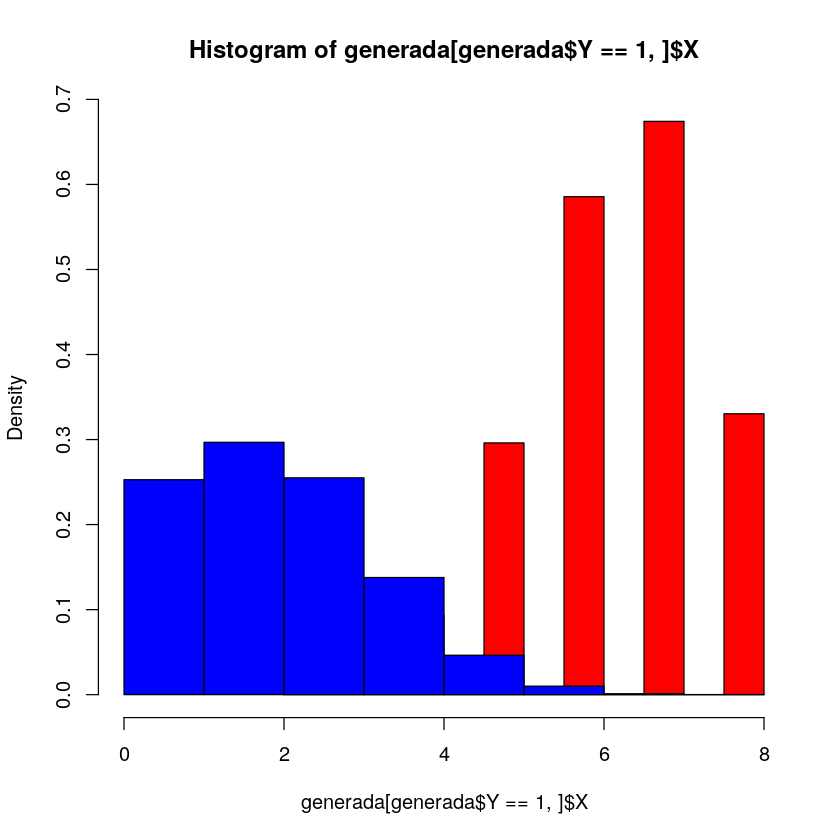

In [161]:
hist(generada[generada$Y==1,]$X, breaks=9, xlim=c(0,8), prob=T, col='red')
hist(generada[generada$Y==0,]$X, breaks=9, prob=T, col='blue', add=T)

Verifico reglas de decisiones de antes buscando el mejor punto de corte:

In [162]:
ts <- 0:9
error.t <- rep(NA, length(ts))
for(t in ts){
    preds.t <- reglacorte(generada$X, t)
    error.t[t+1] <- mean(abs(preds.t - generada$Y))
}

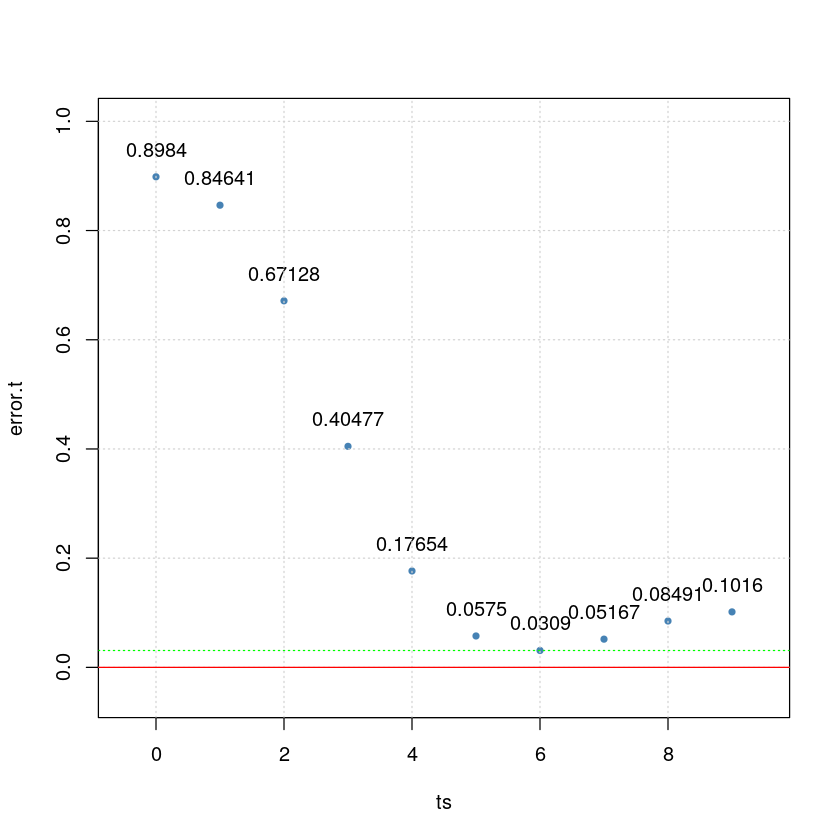

In [163]:
plot(ts, error.t, xlim=c(-0.5,9.5), ylim=c(-0.05, 1), col='steelblue', pch=20)
text(x=ts, y=error.t+0.05, labels=error.t)
grid()
abline(h=0, col='red')
abline(h=min(error.t), col='green', lty=3)

Sigue siendo 6 :)

# BONUS DE BONUS

Cual es la mejor h de todas? de TODAS... hay $2^9 = 512$ reglas de decision posible: busco la mejor entre todas.

In [164]:
toBin <- function(num, long){
    d <- num
    r <- num
    binary <- c()
    while(d > 1){
        r <- d%%2
        d <- d%/%2
        binary <- c(binary, r)
    }
    binary <- c(binary, d)
    # Relleno con ceros
    while(length(binary)<long){
        binary <- c(binary, 0)
    }
    binary <- rev(binary)
   
    return(binary)
}

In [165]:
all.hs <- matrix(nrow=2^9, ncol=9)

for(i in 1:2^9){
    all.hs[i, ] <- toBin(i-1, 9)
}

In [166]:
error.t <- rep(NA, 2^9)
for(i in 1:2^9){
    #print(c(all.hs[i,]))
    #print(i)
    error.t[i] <- ErrorClassTrue(c(all.hs[i,]))
}

In [167]:
all.hs[which.min(error.t),]
min(error.t)

[1] 0 0 0 0 0 0 1 1 1

[1] 0.063

In [168]:
# Reglas con cortes entre las anteriores (binarios terminados en 1, + 1)
all.hs[c(1,2,4,8,16,32,64,128,256,512),]

0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,1,1
0,0,0,0,0,0,1,1,1
0,0,0,0,0,1,1,1,1
0,0,0,0,1,1,1,1,1
0,0,0,1,1,1,1,1,1
0,0,1,1,1,1,1,1,1
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


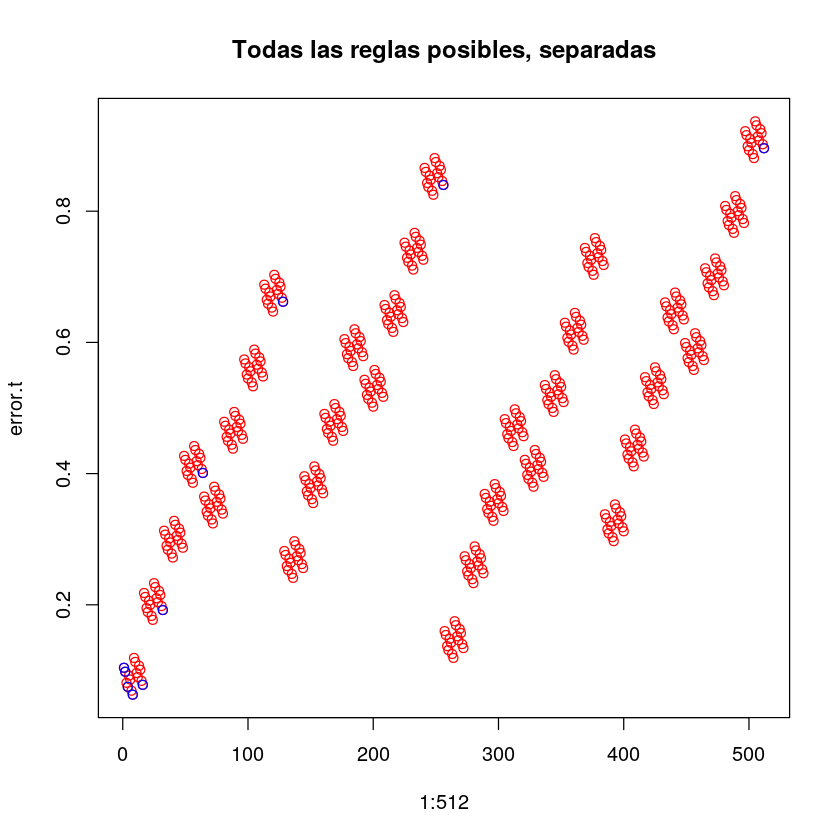

In [169]:
plot(1:512, error.t, main="Todas las reglas posibles, separadas", col="red")
points(c(1,2,4,8,16,32,64,128,256,512), error.t[c(1,2,4,8,16,32,64,128,256,512)], col='blue')

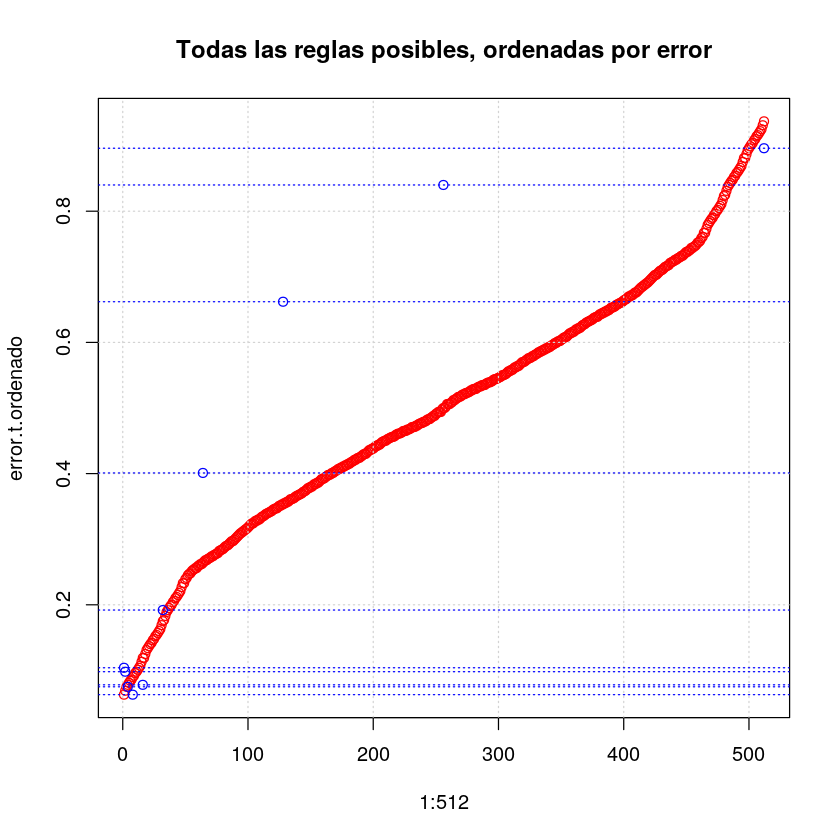

In [170]:
idx.hs <- c(1,2,4,8,16,32,64,128,256,512) 
error.t.ordenado <- error.t[order(error.t)]
idx.t.ordenado   <- c(1:512)[order(error.t)]
plot(1:512, error.t.ordenado, main="Todas las reglas posibles, ordenadas por error", col="red")
grid()
abline(h=error.t[c(1,2,4,8,16,32,64,128,256,512)], col='blue', lty=3)
points(idx.hs[order(error.t[idx.hs])], error.t[idx.hs[order(error.t[idx.hs])]], col='blue', lty=3)

Notar que la mejor regla de decision sigue siendo la misma, pero la segunda mejor no es del estilo de una regla con punto de corte.

De la misma forma, de la quinta mejor en adelante, hay muchas de éstas:

In [171]:
min.error.2 <- (error.t[order(error.t)])[2]
min.hs.2 <- (all.hs[order(error.t),])[2,]
min.error.2
min.hs.2

[1] 0.069

[1] 0 0 0 0 0 0 1 1 0

Notar también cuál es "la peor" regla:

In [172]:
all.hs[order(error.t),]

0,0,0,0,0,0,1,1,1
0,0,0,0,0,0,1,1,0
0,0,0,0,0,0,0,1,1
0,0,0,0,0,1,1,1,1
0,0,0,0,0,0,0,1,0
0,0,0,0,0,1,1,1,0
0,0,0,0,0,0,1,0,1
0,0,0,0,0,1,0,1,1
0,0,0,0,0,0,1,0,0
0,0,0,0,0,1,0,1,0
0,0,0,0,0,0,0,0,1
